## Multippel lineær regresjon og logistisk klassifikasjon

I dag skal vi gjøre det litt annerledes enn sist. Vi kommer til å bruke mesteparten av timen på en tutorial-oppgave som skal ta dere igjennom temaene som dere skal lære i dag. Jeg kommer til å samle opp og forklare litt underveis, men målet er at dere i hovedsak skal jobbe sammen, og at jeg skal komme rundt og veilede dere. Grunnen til det er at dette er den beste måten å lære på. 

I leseleksa så dere på logistisk regresjon og på hvordan man kan validere en modell. Dette skal vi nå jobbe med. 

## Tutorial i logistisk regresjon 

I denne oppgaven skal vi lære å gjøre logistisk regresjon. Logistisk regresjon er en klassifiseringsmetode. Det vil si at vi    ønsker å predikere *kategoriske* utfall. Altså utfall slik som kjønn (mann/kvinne), blodtype (A/B/AB/0) osv. Det som kjennetegner slike utfall er at de ikke enkelt kan tilordnes en numerisk verdi på en skala. Det gir ikke mening å si at blodtype B ligger midt mellom A og AB. De er bare forskjellige blodtyper. Noen ganger kan det være uklart om et utfall må være kategorisk eller om det kunne vært numerisk. Det gjelder i tilfeller der vi vet hvordan vi skal sortere kategoriene. I slike tilfeller kan det gi mening å modellere kategoriske utfall som numeriske utfall. 

1. Hvilke av følgende utfall er kategoriske og hvilke er numeriske? 
    - Temperatur
    - Navn på by
    - Vindstyrke
    - Vindretning
    - Politisk parti
    - Øltype 
    - Karakterer
    - Farge
    - Kjønn  

2. Plott den logistiske funksjonen (s. 134 i ITSL). Hvorfor er denne funksjonen egnet til å predikere et binært kategorisk utfall? 

3. Uforsk hvordan parametrene $\beta_0$ og $\beta_1$ flytter på funksjonen. 

4. Last inn `default`-datasettet (https://zenodo.org/record/6199560/files/default.csv). Plott default mot hvor mye kredittkortlån en person her (balance). Ser du noen sammenheng i dataene? Lag også histogram over balansen til dem som misligholder og dem som ikke misligholder. 

5. Bruk funksjonen `np.histogram` til å lage et histogram over hvem som misligholder og ikke, og bruk deretter histogramverdiene til å regne ut relativ frekvens av mislighold som funksjon av `balance`. Kodesnutten under hjelper deg på vei: 
```python
x = np.linspace(0, 3000, 100)

df_yes = data[data["default"] == 1]
hist_yes = np.histogram(df_yes["balance"], bins=x)[0]
```

6. Prøv å finne gode verdier for parametrene $\beta_0$ og $\beta_1$ slik at du får tegnet en logistisk funksjon som følger dataene godt. 

7. For å slippe å implementere metoden for å gjøre logistisk regresjon på egenhånd, skal vi bruke biblioteket scikit-learn. Næremere bestemt skal vi bruke `sklearn.linear_model.LogisticRegression`. Søk opp denne metoden i scikit-learn-dokumentasjonen og kjør logistisk regresjon på `default`-datasettet med bare `balance`som prediktor. 

8. Lag en *confusion matrix* for å evaluere hvor mange ekte positive, ekte negative, falske positive og falske negative modellen produserer. Synes du modellen oppfører seg fornuftig? 

9. Kjør nå multippel logistisk regresjon på datasettet. Hva er viktig for om noen misligholder kredittkortlånet sitt, og ved hvilke verdier av prediktorene skjer overgangen mellom mislighold og ikke mislighold? Estimer presisjonen til modellen (hvor ofte predikerer den rett og galt?) 

10. Kjør *cross-validation* på den logistiske regresjonsanalysen deres. Bruk `LogisticRegressionCV` fre scikit-learn. Hvordan er presisjonen til modellen når dere analyserer på denne måten? Var forskjellen fra presisjonsmålingen på treningsdata stor? 



1. 
**Kategoriske**
- Navn på by
- Politisk parti (kanskje de kunne sorteres, men usannsynlig)
- Øltype (med mindre man kun ser på alkohol)
- Karakterer (kanskje, kanskje ikke)
- Farge (kommen an på kontekst)
- Kjønn

**Numeriske**
- Temperatur
- Vindstyrke
- Vindretning
- Karakterer (vanligvis, man regner jo gjennomsnitt)
- Farge (Om man ser på bølgelengden)


2. Sigmoidfunksjonen slik vi bruker den i logistisk regresjon er 

$$ p(X) = \frac{e^{\beta_0 + \beta_1 X}}{1+e^{\beta_0 + \beta_1 x}} $$

Denne funksjonen er godt egnet til å beregne binære utfall fordi den er begrenser på intervallet 0 til 1. 


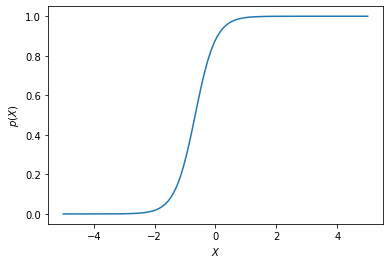

In [238]:
import numpy as np
import matplotlib.pyplot as plt

def logistic(beta_0, beta_1, X): 
    return np.exp(beta_0 + beta_1*X)/(1+np.exp(beta_0 + beta_1*X))

x = np.linspace(-5, 5, 100)
y = logistic(2, 3, x)
plt.plot(x, y)
plt.xlabel(r"$X$")
plt.ylabel(r"$p(X)$")
plt.savefig("logistic.svg")

3. 

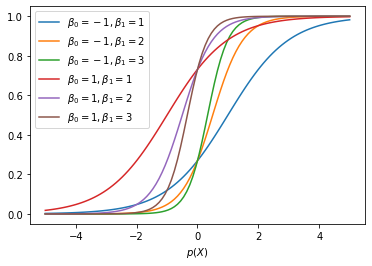

In [240]:
### Auto-utforsk
beta0s = [-1, 1]
beta1s = [1, 2, 3]

for beta0 in beta0s: 
    for beta1 in beta1s:
        x = np.linspace(-5, 5, 100)
        y = logistic(beta0, beta1, x)
        plt.plot(x, y, label=rf"$\beta_0 = {beta0}, \beta_1 = {beta1}$")
plt.legend()
plt.xlabel(r"$X$")
plt.xlabel(r"$p(X)$")
plt.savefig("logistic_variation.svg")

In [97]:
from ipywidgets import interactive
#import matplotlib.pyplot as plt
import numpy as np

def f(beta0, beta1):
    x = np.linspace(-5, 5, num=1000)
    plt.plot(x, logistic(beta0, beta1, x))
    plt.ylim(-0.1, 1.1)

interactive_plot = interactive(f, beta0=(-3.0, 3.0), beta1=(-3, 3, 0.1))
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='beta0', max=3.0, min=-3.0), FloatSlider(value=0.0, d…

Konklusjon: $\beta_1$ styrer hvor bratt funksjonen er og $\beta_0$ flytter vendepunktet fram og tilbake. Men posisjonen til vendepunktet er avhengig av både $\beta_0$ og $\beta_1$. 



4. 


In [5]:
import pandas as pd
df = pd.read_csv("https://zenodo.org/record/6199560/files/default.csv")
df.replace("Yes", 1, inplace=True)
df.replace("No", 0, inplace=True)
df

Unnamed: 0  default  student      balance        income
0              1        0        0   729.526495  44361.625074
1              2        0        1   817.180407  12106.134700
2              3        0        0  1073.549164  31767.138947
3              4        0        0   529.250605  35704.493935
4              5        0        0   785.655883  38463.495879
...          ...      ...      ...          ...           ...
9995        9996        0        0   711.555020  52992.378914
9996        9997        0        0   757.962918  19660.721768
9997        9998        0        0   845.411989  58636.156984
9998        9999        0        0  1569.009053  36669.112365
9999       10000        0        1   200.922183  16862.952321

[10000 rows x 5 columns]

<AxesSubplot:xlabel='balance', ylabel='default'>

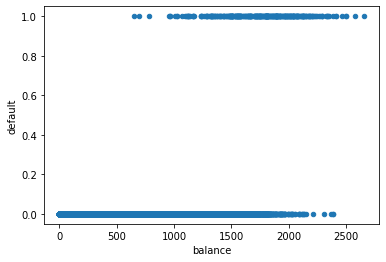

In [98]:
df.plot("balance", "default", kind="scatter")

Her ser vi stort sett to klumper med data. For å klare å se litt mer av hva som skjer kan vi ta lokale gjennomsnitt for å estimere sannsynligheten for mislighold. 
Vi begynner med å lage histogram over parametrene default og ikke default. 


(array([4.50017209e-05, 9.00034419e-05, 2.55009752e-04, 5.25020078e-04,
        9.45036140e-04, 1.11004245e-03, 1.11004245e-03, 6.45024667e-04,
        1.95007457e-04, 7.50028682e-05]),
 array([ 652.39713441,  852.5896786 , 1052.78222279, 1252.97476697,
        1453.16731116, 1653.35985535, 1853.55239953, 2053.74494372,
        2253.93748791, 2454.13003209, 2654.32257628]),
 <BarContainer object of 10 artists>)

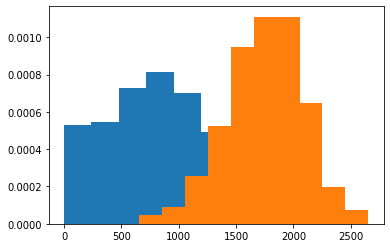

In [116]:
# Direkte: 
df_no = df[df["default"] == 0]
plt.hist(df_no["balance"], density=True)
df_yes = df[df["default"] == 1]
plt.hist(df_yes["balance"], density=True)

default
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: balance, dtype: object

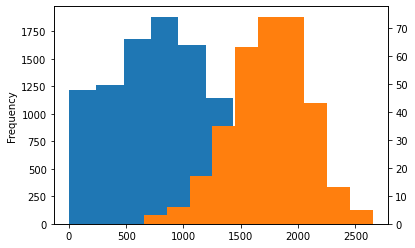

In [115]:
df.groupby("default")["balance"].plot.hist(density=False,  secondary_y=[1])

/var/folders/qn/3_cqp_vx25v4w6yrx68654q80000gp/T/ipykernel_74481/3560903358.py:13: RuntimeWarning: invalid value encountered in true_divide
  andel_mislighold = hist_yes/(hist_yes+hist_no)


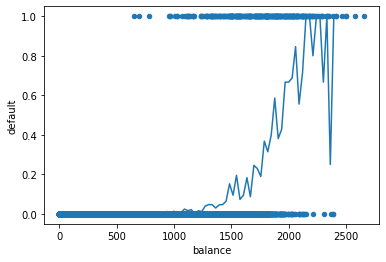

In [93]:
# Modellere videre
import numpy as np
df.plot("balance", "default", kind="scatter")

x = np.linspace(0, 3000, 100)

df_yes = df[df["default"] == 1]
hist_yes = np.histogram(df_yes["balance"], bins=x)[0]

df_no = df[df["default"] == 0]
hist_no = np.histogram(df_no["balance"], bins=x)[0]

andel_mislighold = hist_yes/(hist_yes+hist_no)
plt.plot(x[:-1], andel_mislighold)

Siden vi nå har regnet ut andelen som misligholder i små intervaller av variabelen `balance`, har vi et estimat på sannsynlighet for mislighold gitt `balance`. Vi ser kanskje også at funksjonsformen ligner på den logistiske funksjonen. Derfor vil vi prøve å modellere dette datasettet med logistisk regresjon. 

In [231]:
# Logistisk regresjon med default-datasettet
from sklearn.linear_model import LogisticRegression

X = df.loc[:, ["balance"]]
y = df.loc[:, ["default"]].to_numpy().ravel()

clf = LogisticRegression(random_state=42, C=1e-7).fit(X, y)


/Users/henriasv/.pyenv/versions/3.9.9/envs/hon2200/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/henriasv/.pyenv/versions/3.9.9/envs/hon2200/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


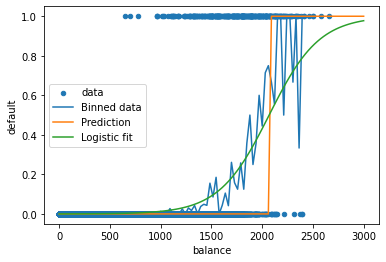

In [232]:
# Plotte modellen
import numpy as np
df.plot.scatter("balance", "default", label="data")

x = np.linspace(0, 3000, 100)
plt.plot(x[:-1], andel_mislighold, label="Binned data")

y_hat = clf.predict(x[:,np.newaxis])
plt.plot(x, y_hat, label="Prediction")
plt.plot(x, clf.predict_proba(x[:,np.newaxis])[:,1], label="Logistic fit")

plt.legend()

Score:  0.9709


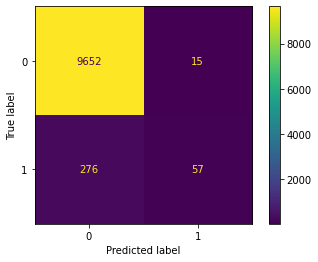

In [233]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
y_hat = clf.predict(X)
print("Score: ", clf.score(X, y))
confusion_matrix(y, y_hat)
ConfusionMatrixDisplay.from_predictions(y, y_hat)

/var/folders/qn/3_cqp_vx25v4w6yrx68654q80000gp/T/ipykernel_74481/3014530260.py:13: RuntimeWarning: invalid value encountered in true_divide
  andel_mislighold = hist_yes/(hist_yes+hist_no)
/var/folders/qn/3_cqp_vx25v4w6yrx68654q80000gp/T/ipykernel_74481/3014530260.py:13: RuntimeWarning: invalid value encountered in true_divide
  andel_mislighold = hist_yes/(hist_yes+hist_no)


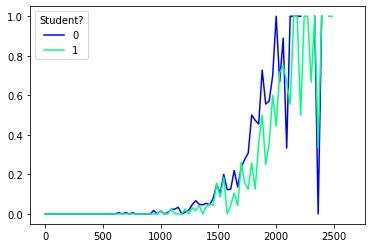

In [136]:
import matplotlib
colormap = "winter"
cmap = matplotlib.cm.get_cmap(colormap)
x = np.linspace(0, 3000, 100)

for name, value in df.groupby("student"):
    df_yes = value[value["default"] == 1]
    hist_yes = np.histogram(df_yes["balance"], bins=x)[0]

    df_no = value[value["default"] == 0]
    hist_no = np.histogram(df_no["balance"], bins=x)[0]

    andel_mislighold = hist_yes/(hist_yes+hist_no)

    if name == 0:
        plt.plot(x[:-1], andel_mislighold, label=name, c=cmap(0.0))
    elif name == 1:
        plt.plot(x[:-1], andel_mislighold, label=name, c=cmap(1.0))
        
plt.legend(title="Student?")

/var/folders/qn/3_cqp_vx25v4w6yrx68654q80000gp/T/ipykernel_74481/2483415999.py:17: RuntimeWarning: invalid value encountered in true_divide
  andel_mislighold = hist_yes/(hist_yes+hist_no)
/var/folders/qn/3_cqp_vx25v4w6yrx68654q80000gp/T/ipykernel_74481/2483415999.py:17: RuntimeWarning: invalid value encountered in true_divide
  andel_mislighold = hist_yes/(hist_yes+hist_no)


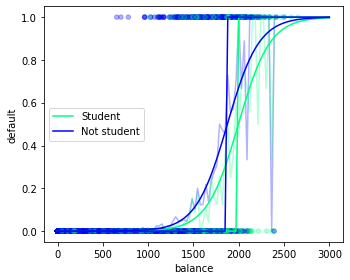

In [184]:
# Logistisk regresjon med default-datasettet
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt 
import numpy as np

df.plot.scatter("balance", "default", c="student", cmap=colormap, alpha=0.3, sharex=False)
plt.gcf().delaxes(plt.gcf().axes[1])

x = np.linspace(0, 3000, 100)
for is_student, subset in df.groupby("student"):
    df_yes = subset[subset["default"] == 1]
    hist_yes = np.histogram(df_yes["balance"], bins=x)[0]

    df_no = subset[subset["default"] == 0]
    hist_no = np.histogram(df_no["balance"], bins=x)[0]

    andel_mislighold = hist_yes/(hist_yes+hist_no)

    if is_student == 0:
        plt.plot(x[:-1], andel_mislighold, c=cmap(0.0), alpha=0.3)
    elif is_student == 1:
        plt.plot(x[:-1], andel_mislighold, c=cmap(1.0), alpha=0.3)


X = df.loc[:, ["balance", "student"]]
y = df.loc[:, ["default"]].to_numpy().ravel()

clf = LogisticRegression(random_state=42).fit(X, y)

x = pd.DataFrame({"balance" : np.linspace(0, 3000, 100), "student" : np.ones(100)})
plt.plot(x["balance"], clf.predict_proba(x)[:,1], label="Student", c=cmap(1.0))
plt.plot(x["balance"], clf.predict(x), c=cmap(1.0))

x = pd.DataFrame({"balance" : np.linspace(0, 3000, 100), "student" : np.zeros(100)})
plt.plot(x["balance"], clf.predict_proba(x)[:,1], label="Not student", c=cmap(0.0))
plt.plot(x["balance"], clf.predict(x), c=cmap(0.0))

plt.legend()
plt.tight_layout()


Score:  0.9733
[[9628   39]
 [ 228  105]]


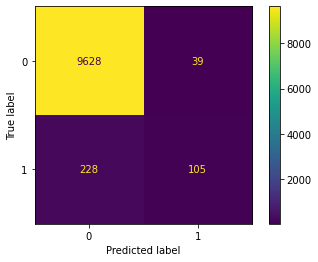

In [236]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

X = df.loc[:, ["balance", "student"]]
y = df.loc[:, ["default"]].to_numpy().ravel()

clf = LogisticRegression(random_state=42, C=1e4).fit(X, y)

print("Score: ", clf.score(X, y))

y_hat = clf.predict(X)
print(confusion_matrix(y, y_hat))
ConfusionMatrixDisplay.from_predictions(y, y_hat)

Dette er egentlig ganske bedrøvelig. Vi klarer bare å fange opp en tredel av dem som misligholder kredittkortlånet sitt. Men det kan allikevel være nyttig, for det bør kutte utlånstapene på nye lån med minimum en tredel. Og vi finner flere misligholdere enn vi mister gode betalere. 

Score:  {1: array([[0.972],
       [0.979],
       [0.971],
       [0.977],
       [0.971],
       [0.971],
       [0.971],
       [0.974],
       [0.978],
       [0.969]])}
Coef:  [[ 0.00573987 -0.71556183]]
[[9628   39]
 [ 228  105]]


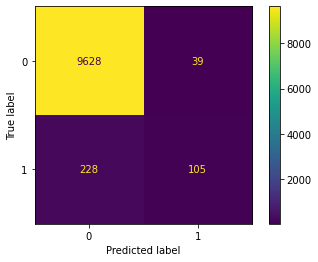

In [223]:
# Confusion matrix
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

X = df.loc[:, ["balance", "student"]]
y = df.loc[:, ["default"]].to_numpy().ravel()

clf = LogisticRegressionCV(random_state=3, cv=10, tol=1e-7, Cs = [1e4]).fit(X, y)

print("Score: ", clf.scores_)
print("Coef: ", clf.coef_)


y_hat = clf.predict(X)
print(confusion_matrix(y, y_hat))
ConfusionMatrixDisplay.from_predictions(y, y_hat)

5. 

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                 5.1               3.5                1.4               0.2   
1                 4.9               3.0                1.4               0.2   
2                 4.7               3.2                1.3               0.2   
3                 4.6               3.1                1.5               0.2   
4                 5.0               3.6                1.4               0.2   
5                 5.4               3.9                1.7               0.4   
6                 4.6               3.4                1.4               0.3   
7                 5.0               3.4                1.5               0.2   
8                 4.4               2.9                1.4               0.2   
9                 4.9               3.1                1.5               0.1   
10                5.4               3.7                1.5               0.2   
11                4.8               3.4 

/Users/henriasv/.pyenv/versions/3.9.9/envs/hon2200/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


NameError: name 'data' is not defined

<Figure size 432x288 with 0 Axes>

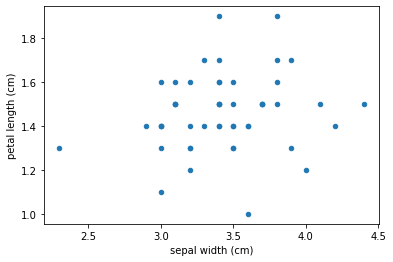

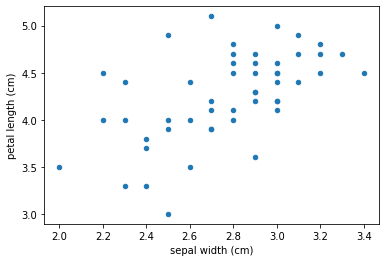

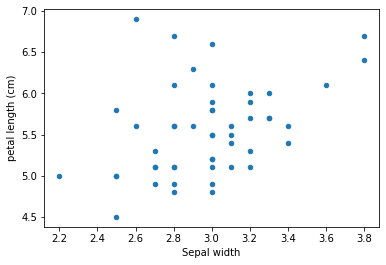

In [83]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import pandas as pd
X,y = load_iris(as_frame=True, return_X_y=True)
X["target"] = y

clf = LogisticRegression(random_state=42).fit(X, y)
#print(clf.predict(X[:2, :]))
#print(clf.predict_proba(X[:2, :]))
clf.score(X, y)

ax = plt.subplot()
for name, subframe in X.groupby("target"):
    subframe.plot(1, 2, kind="scatter", ax=ax, )
#plt.plot(X[:,0], X[:,1], )
plt.xlabel("Sepal length")
plt.xlabel("Sepal width")

display(data)
display(target)

## Beslutningstrær

Dette er noe vi har med fordi det danner grunnlaget for en veldig kraftig metode som heter XGBoost. Vi krever ikke at dere forstår metoden fullt ut, men ønsker at dere skal ha en viss forståelse for hvordan det fungerer. Vi kommer til å legge mest vekt på at dere kan gjøre fornuftig feilanalyse av modellene, slik at metoden i seg selv i stor grad kan behandles som en svart boks. 

In [5]:


import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

df = pd.read_csv("https://zenodo.org/record/6075333/files/Boston.csv")
df = df.sort_values(by="nox")

X = df[["nox", "lstat"]].values # Pass på antall klammer
Y = df[["medv"]].values


[[ 1.04245301 -0.96004457]]
[34.10206739]


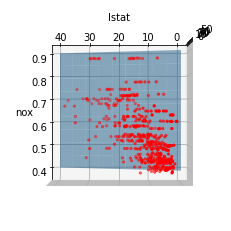

In [4]:

linear_model = LinearRegression().fit(X, Y)
print(linear_model.coef_)
print(linear_model.intercept_)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y, marker='.', color='red')

y_pred = linear_model.predict(X)

coefs = linear_model.coef_
intercept = linear_model.intercept_
xs = np.tile(np.linspace(0.4, 0.9, 10), (10,1))
ys = np.tile(np.linspace(0, 40, 10), (10,1)).T
zs = xs*coefs[0,0]+ys*coefs[0,1]+intercept
ax.plot_surface(xs,ys,zs, alpha=0.5)
ax.set_xlabel("nox")
ax.set_ylabel("lstat")
ax.view_init(elev=90., azim=180)

Ved å variere synsvinkelen kan vi finne at nox-nivået varierer med andelen lavere status innbyggere, og at denne egenskapen har tatt over som det den lineære modellen plukker opp. Men det er jo fortsatt et spørsmål om hva som er høna og egget. 

